In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Generate synthetic data
X, y = make_classification(
    n_samples=500,         # total samples
    n_features=3,          # number of input features
    n_informative=3,       # all features are useful
    n_redundant=0,         # no redundant features
    n_clusters_per_class=1,
    class_sep=2.0,         # controls how separable the classes are
    random_state=42        # reproducibility
)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.cost_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        m = X.shape[0]
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        cost = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return cost

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            dw = (1/m) * np.dot(X.T, (predictions - y))
            db = (1/m) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)

            if i % 100 == 0:
                print(f"Epoch {i}: Cost = {cost:.4f}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z) >= 0.5

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        print("Accuracy:", accuracy_score(y, y_pred))
        print("Precision:", precision_score(y, y_pred))
        print("Recall:", recall_score(y, y_pred))

    def interpret(self):
        for i, w in enumerate(self.weights):
            print(f"Feature {i+1}: Weight = {w:.4f}")
        print(f"Bias: {self.bias:.4f}")

    def plot_loss(self):
        plt.plot(self.cost_history)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.title("Training Loss Curve")
        plt.show()



Epoch 0: Cost = 0.6832
Epoch 100: Cost = 0.2910
Epoch 200: Cost = 0.2063
Epoch 300: Cost = 0.1701
Epoch 400: Cost = 0.1498
Epoch 500: Cost = 0.1367
Epoch 600: Cost = 0.1275
Epoch 700: Cost = 0.1207
Epoch 800: Cost = 0.1154
Epoch 900: Cost = 0.1112
Accuracy: 0.99
Precision: 1.0
Recall: 0.9791666666666666
Feature 1: Weight = 1.6959
Feature 2: Weight = -0.0904
Feature 3: Weight = -0.0814
Bias: -0.2006


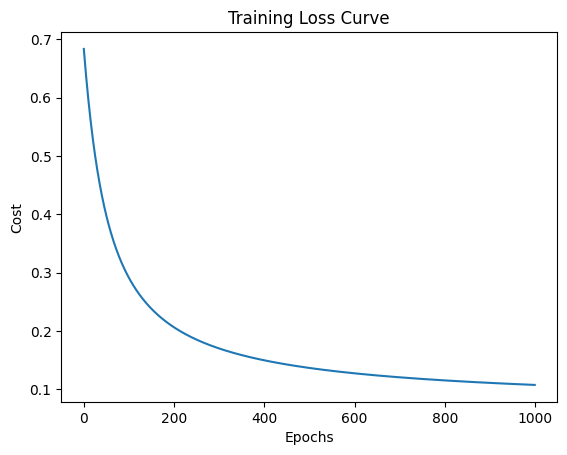

In [30]:
model = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)
model.evaluate(X_test, y_test)
model.interpret()
model.plot_loss()